In [9]:

import numpy as np
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout


In [10]:
images = []
labels = []
classes = 43
c_path = "~/GTSRB/Training/Images"

new_test = os.listdir("~/GTSRB/Test/Images")

for i in range(classes):
    path = os.path.join(c_path, str(str(i).zfill(5)))
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(str(path+'/'+j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)#converting image to grayscale
            image = np.array(image)
            images.append(image)
            label = np.zeros(classes)
            label[i] = 1.0
            labels.append(label)
        except:
            pass

In [11]:
images = np.array(images)
images = images/255 #normalising data(0-1)
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (39209, 32, 32)
Labels shape: (39209, 43)


In [12]:
#casts the bytes from float32 to uint8
X = images.astype(np.float32)
y = labels.astype(np.float32)

#splitting dataset for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


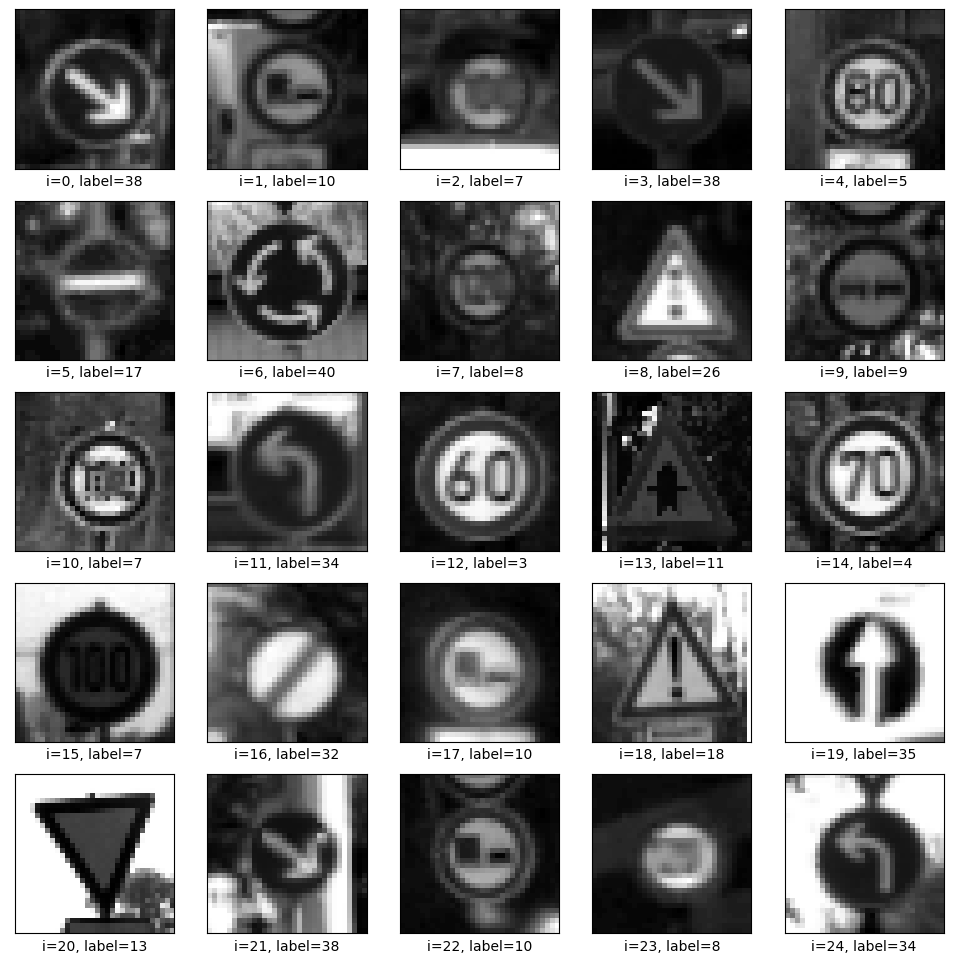

In [13]:
#showing a few examples of dataset
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i], cmap='gray')
plt.show()

In [14]:
#Definition Model architecture
model = Sequential([
    Rescaling(1, input_shape=(32, 32, 1)),
    Conv2D(filters=6, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=43, activation='softmax')
])

# Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 120)        

In [15]:
#Training the model
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test))


2022-12-01 00:08:04.836213: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-01 00:08:04.838815: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-12-01 00:08:12.120642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


981/981 [==============================] - ETA: 0s - loss: 2.4191 - accuracy: 0.3467

2022-12-01 00:08:24.879561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


981/981 [==============================] - 22s 15ms/step - loss: 2.4182 - accuracy: 0.3469 - val_loss: 0.6170 - val_accuracy: 0.8188
Epoch 2/100
981/981 [==============================] - 14s 15ms/step - loss: 0.6094 - accuracy: 0.8196 - val_loss: 0.3282 - val_accuracy: 0.9070
Epoch 3/100
981/981 [==============================] - 14s 14ms/step - loss: 0.3736 - accuracy: 0.8883 - val_loss: 0.2615 - val_accuracy: 0.9295
Epoch 4/100
981/981 [==============================] - 14s 14ms/step - loss: 0.2730 - accuracy: 0.9219 - val_loss: 0.2137 - val_accuracy: 0.9408
Epoch 5/100
981/981 [==============================] - 14s 14ms/step - loss: 0.2094 - accuracy: 0.9398 - val_loss: 0.1497 - val_accuracy: 0.9577
Epoch 6/100
981/981 [==============================] - 14s 14ms/step - loss: 0.1705 - accuracy: 0.9508 - val_loss: 0.1240 - val_accuracy: 0.9674
Epoch 7/100
981/981 [==============================] - 14s 15ms/step - loss: 0.1540 - accuracy: 0.9556 - val_loss: 0.1075 - val_accuracy: 0.97

In [16]:
#checking for model accuracy
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nValifdation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

246/246 - 2s - loss: 0.0830 - accuracy: 0.9911

Valifdation accuracy: 0.991073727607727

Validation loss: 0.08301172405481339


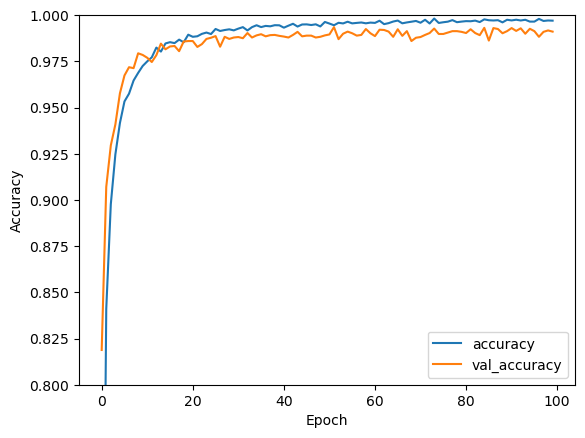

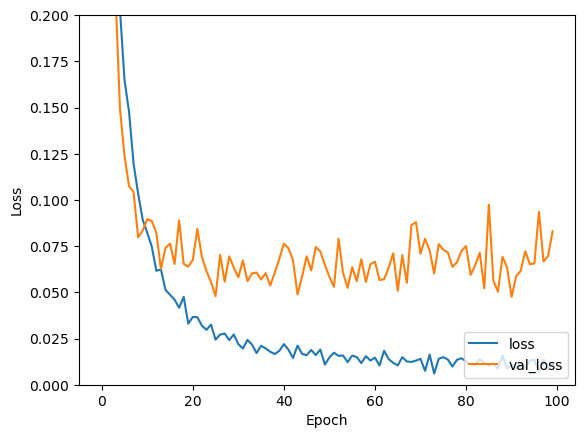

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='lower right')


2022-12-01 00:32:03.688357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


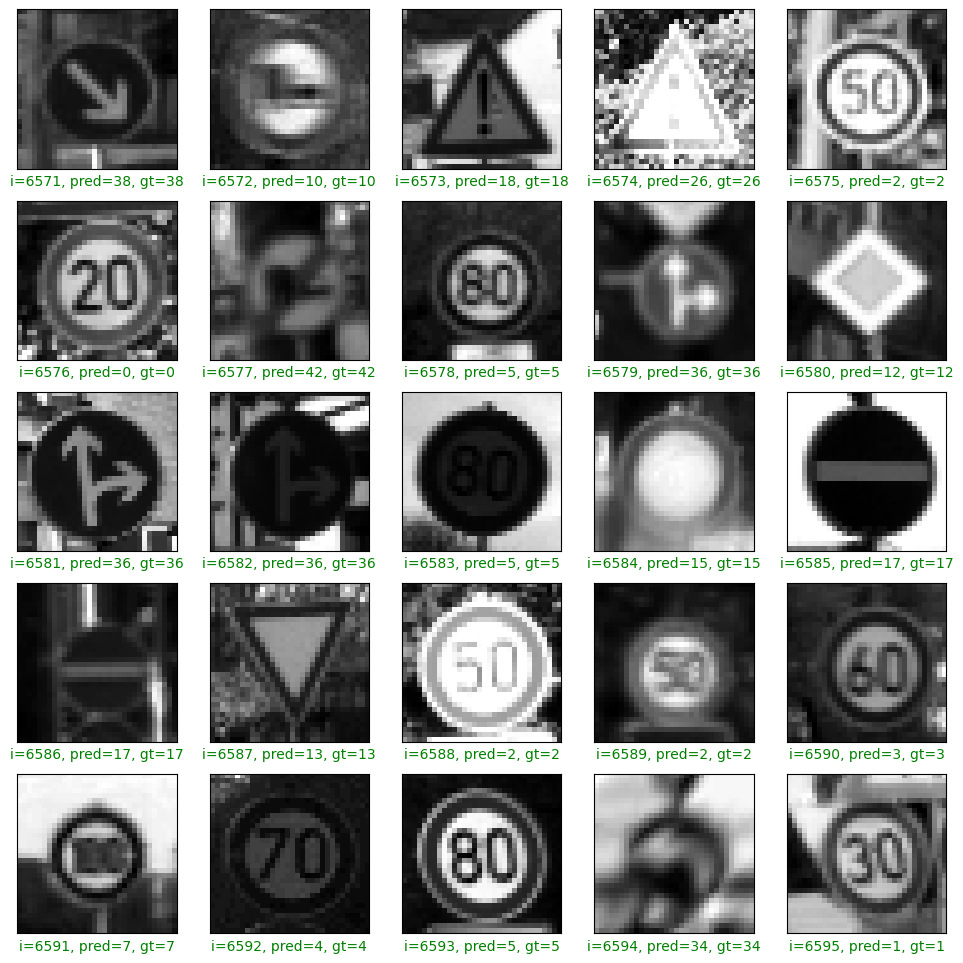

In [18]:

#Prediction examples
preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 7800)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='gray')
plt.show()

